#  Algorithme de Grover - La bibliothèque quantique

<video width="1280" height="720" controls>
  <source src="Les Énigmes quantiques -  Algorithme de Grover - La bibliothèque quantique.mp4" type="video/mp4">
</video>

**<u>Problème:</u>** </br>
"Bob est victime d'un mauvais sort. Il se sent toujours un peu déphasé.</br>
Le rituel pour lever cette malédiction se trouve dans un grimoire stocké dans une bibliothèque quantique.  
Dans la section de la bibliothèque il n'y a que 4 grimoires mais l'emprunt d'un grimoire ne ce fait que au hasard.  
Bob peut faire appel à Aïka qui a le pouvoir de marquer le bon grimoire en inversant sa phase."

**<u>Solution:</u>**  
Bob est chargé d'implémenter l'algorithme de Glover dans un dispositif de diffusion. Ce dispositif crée une superposition égale de tous les états, mais avec une particularité : la phase de l'état correspondant au bon grimoire est modifiée (par Aïka). Le dispositif opère simultanément sur les quatre grimoires, traitant chacun comme s'il avait une probabilité de 100% d'être choisi. Il calcule ensuite la somme des quatre résultats individuels. Ce processus amplifie l'amplitude associée au grimoire ciblé à 100%, tout en réduisant l'amplitude des autres grimoires à 0%.  

## Import

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Création des composants du circuit quantique

- Dans notre circuit, nous auront besoin de 2 qbit pour représenter les 4 grimoires</br>
On place des porte Hadamard sur q0 et q1 pour que tout les grimoires ai la même probabilité d'être empruntés

In [2]:
def init_circ():

    # ? Création d'un circuit quantique avec 2 qubits
    circ = QuantumCircuit(2)

    # ? Ajout d'une porte Hadamard sur les deux qubits pour les mettre dans un état superposé
    circ.h(0)
    circ.h(1)

    return circ

### Visualisation de l'initialisation du circuit 

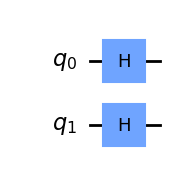

In [3]:
# ? Création du circuit quantique
circ = init_circ()

# ? Affichage du circuit quantique
circ.draw(output='mpl')

Bob peut désormais faire appel au pouvoir d'Aïka qui inverse la phase de l'état correspondant au grimoire.  
Son pouvoir n'agit pas de la même maière piur les quatres grimmoires. Sont circuit dépend donc du grimoire visé.

### Création de l'Oracle du premier Grimoire

In [4]:
def oracle_grimoire_1(circ):

    # ? Ajout d'une porte X sur le premier qubit pour inverser son état
    circ.x(0)

    # ? Ajout d'une porte X sur le second qubit pour inverser son état
    circ.x(1)

    # ? Ajout d'une porte CZ pour inverser l'état du qubit cible si le qubit de contrôle est dans l'état |1>
    circ.cz(0, 1)

    # ? Ajout d'une porte X sur le premier qubit pour inverser son état
    circ.x(0)

    # ? Ajout d'une porte X sur le second qubit pour inverser son état
    circ.x(1)

    return circ

##### Visualisation de la partie du Circuit Quantique créée

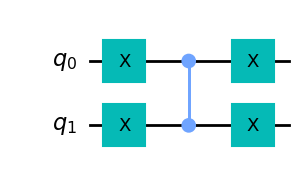

In [5]:
# ? Création du circuit quantique avec 2 qubits
circ = QuantumCircuit(2)

# ? Ajout de la partie responsable de l'Oracle du Grimoire 1 au circuit quantique
oracle_grimoire_1(circ)

# ? Affichage du circuit quantique
circ.draw(output='mpl')


##### Second Grimmoire

In [6]:
def oracle_grimoire_2(circ):

    # ? Ajout d'une porte X sur le second qubit pour inverser son état
    circ.x(1)

    # ? Ajout d'une porte CZ pour inverser l'état du qubit cible si le qubit de contrôle est dans l'état |1>
    circ.cz(0, 1)

    # ? Ajout d'une porte X sur le second qubit pour inverser son état
    circ.x(1)

    return circ

##### Visualisation de la partie du Circuit Quantique créée

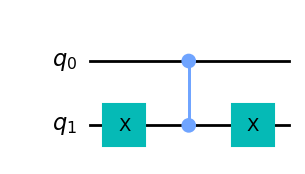

In [7]:
# ? Création du circuit quantique
circ = QuantumCircuit(2)

# ? Ajout de la partie responsable de l'Oracle du Grimoire 2 au circuit quantique
oracle_grimoire_2(circ)

# ? Affichage du circuit quantique
circ.draw(output='mpl')

##### Troisième Grimmoire 

In [8]:
def oracle_grimoire_3(circ):

    # ? Ajout d'une porte X sur le premier qubit pour inverser son état
    circ.x(0)

    # ? Ajout d'une porte CZ pour inverser l'état du qubit cible si le qubit de contrôle est dans l'état |1>
    circ.cz(0, 1)

    # ? Ajout d'une porte X sur le premier qubit pour inverser son état
    circ.x(0)

    return circ

##### Visualisation de la partie du Circuit Quantique créée

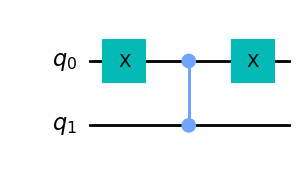

In [9]:
# ? Création du circuit quantique
circ = QuantumCircuit(2)

# ? Ajout de la partie responsable de l'Oracle du Grimoire 3 au circuit quantique
oracle_grimoire_3(circ)

# ? Affichage du circuit quantique
circ.draw(output='mpl')

Quatrième Grimmoire

In [10]:
def oracle_grimoire_4(circ):

    # ? Ajout d'une porte CZ pour inverser l'état du qubit cible si le qubit de contrôle est dans l'état |1>
    circ.cz(0, 1)

    return circ

##### Visualisation de la partie du Circuit Quantique créée

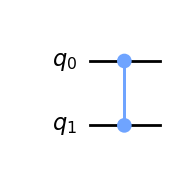

In [11]:
# ? Création du circuit quantique
circ = QuantumCircuit(2)

# ? Ajout de la partie responsable de l'Oracle du Grimoire 4 au circuit quantique
oracle_grimoire_4(circ)

# ? Affichage du circuit quantique
circ.draw(output='mpl')

##### Implémentation du diffuseur
Il permet de mettre à zéro les probabilité de tous les grimoire sauf pour celui marqué par Aïka.

In [12]:
def diffuseur(circ):

    # ? Ajout d'une porte Hadamard sur les deux qubits pour les mettre dans un état superposé
    circ.h(0)
    circ.h(1)

    # ? Ajout d'une porte Z sur les deux qubits pour inverser leur état
    circ.z(0)
    circ.z(1)

    # ? Ajout d'une porte CZ pour inverser l'état du qubit cible si le qubit de contrôle est dans l'état |1>
    circ.cz(0,1)

    # ? Ajout d'une porte Hadamard sur les deux qubits pour les mettre dans un état superposé
    circ.h(0)
    circ.h(1)

    return circ

##### Visualisation de la partie du Circuit Quantique créée

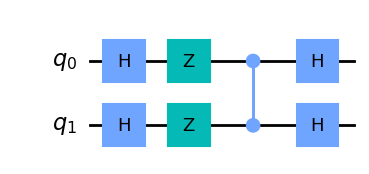

In [13]:
# ? Création du circuit quantique à 2 qubits
circ = QuantumCircuit(2)

# ? Ajout de la partie responsable du diffuseur au circuit quantique (situé après l'oracle)
diffuseur(circ)

# ? Affichage du circuit quantique
circ.draw(output='mpl')

# Simulation

## Création du Circuit Quantique finale en assemblant toutes les parties précédentes

In [14]:
def build_circ(grimoire):
    # ? Créer le circuit de l'oracle correspondant au grimoire
    circ = init_circ()

    # * Dictionnaire de correspondance grimoire-fonction
    grimoire_number = {
        1: oracle_grimoire_1,
        2: oracle_grimoire_2,
        3: oracle_grimoire_3,
        4: oracle_grimoire_4
    }

    if grimoire in grimoire_number:
        # ? Appel de la fonction correspondante
        grimoire_number[grimoire](circ)
    else:
        # ! Si le grimoire n'est pas dans le dictionnaire on lève une erreur
        raise ValueError("Le grimoire n'est pas dans la liste des grimoires disponibles.")

    diffuseur(circ)
    return circ

Grâce à nos implémentations précédentes, nous pouvons construire un circuit quantique, assemblé des trois parties créer en amont en 3 parties que nous nommeront respectivement : 
- L'<b>Initialisation</b>, 
- La création de L'<b>Oracle N</b> (Pour chaque grimmoire)
- La création du <b>Diffuseur</b>

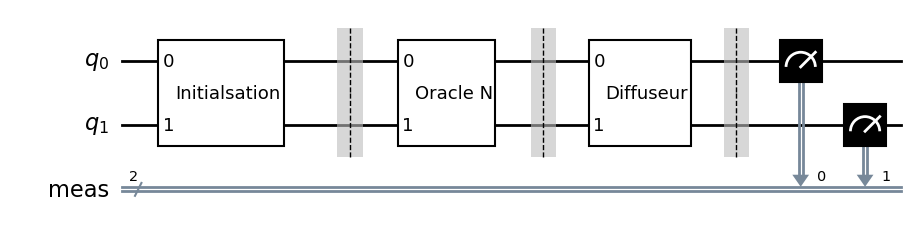

In [15]:
def demonstration():
    # Circuit principal avec 2 qubits
    my_demonstration_circuit = QuantumCircuit(2)

    # Création et ajout de la porte "Haddamard"
    my_gate = init_circ().to_gate(label="Initialsation")
    my_demonstration_circuit.append(my_gate, [0, 1])
    my_demonstration_circuit.barrier()

    # Création et ajout de la porte "Oracle"
    my_gate = oracle_grimoire_1(QuantumCircuit(2)).to_gate(label="Oracle N")
    my_demonstration_circuit.append(my_gate, [0, 1])
    my_demonstration_circuit.barrier()

    # Création et ajout de la porte "Diffuseur"
    my_gate = diffuseur(QuantumCircuit(2)).to_gate(label="Diffuseur")
    my_demonstration_circuit.append(my_gate, [0, 1])

    # Mesure sur tous les qubits
    my_demonstration_circuit.measure_all()

    return my_demonstration_circuit

demonstration().draw(output='mpl', style="bw")


## Création des paramètres de simulation 

In [16]:
def simulate(circ):

    # ? Initialisation des valeurs de sortie du graphique
    all_states = {'00': 0, '01': 0, '10': 0, '11': 0}

    # ? Ajout des mesures finales sur les deux qubits
    circ.measure_all()
    
    # ? Transpilation du circuit pour le rendre compatible avec le simulateur Aer
    simulator: AerSimulator = Aer.get_backend('aer_simulator')

    # ? Exécution du circuit quantique sur le simulateur Aer
    circ = transpile(circ, simulator)

    # ? Récupération des résultats de l'exécution du circuit quantique
    result = simulator.run(circ).result()

    # ? Comptage des résultats de l'exécution du circuit quantique
    counts = result.get_counts(circ)

    # ? Ajout des résultats de l'exécution du circuit quantique au dictionnaire de sortie
    all_states.update(counts)
    
    return all_states

## Simulation sur le Grimoire n°1

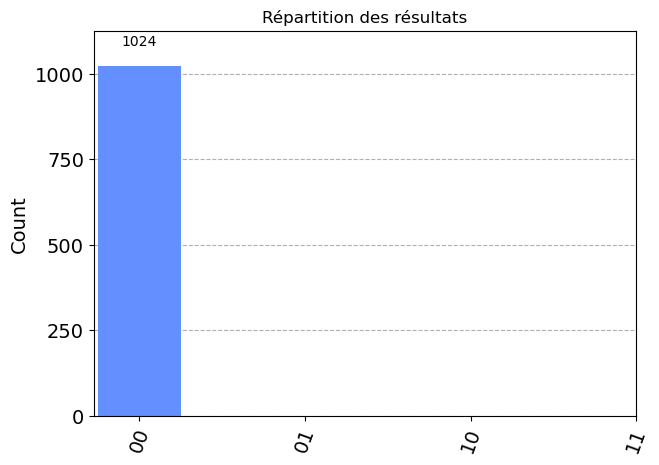

In [17]:
circ = build_circ(grimoire=1)
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

## Simulation sur le Grimoire n°2

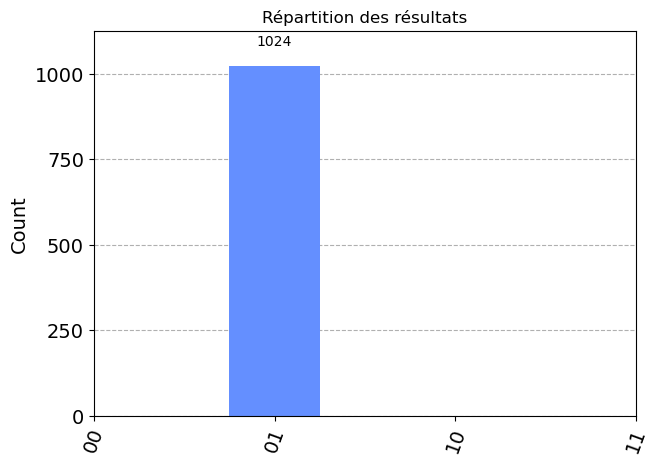

In [18]:
circ = build_circ(grimoire=2)
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

## Simulation sur le Grimoire n°3

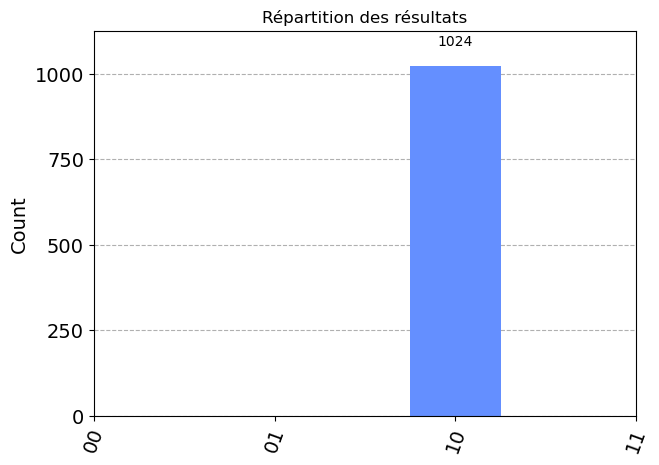

In [19]:
circ = build_circ(grimoire=3)
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

## Simulation sur le Grimoire n°4

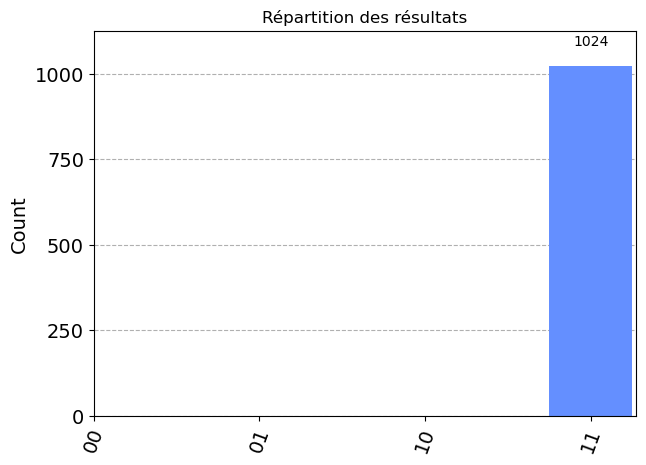

In [20]:
circ = build_circ(grimoire=4)
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

## Conclusion

Nous pouvons observer d'après les résultats précédents qu'avec son diffuseur quantique et l'aide d'Aïka, bob trouve toujours le bon grimoire.</br>
Cette solution lui permet donc de lever la malédiction et de termier cette énigme.